In [18]:
import ipywidgets as widgets
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [19]:
DATA_DIR = "data/"
BASE_NAME = "headings_z"

downsample = True
downsample_factor = 4

alt_base = 1
xy_res = 250
z_res = 61
n_layers = 12

In [20]:
layer_vect = []

# Import data files for each z layer
for z in range(n_layers):
    mat = np.loadtxt(DATA_DIR + BASE_NAME + str(z) + '.csv', delimiter=',')
    if downsample:
        kernel = np.ones((downsample_factor, downsample_factor))
        convolved = convolve2d(mat, kernel)
        mat = convolved[::downsample_factor, ::downsample_factor] / downsample_factor
    layer_vect.append(mat)
    
full_arr = np.dstack(layer_vect)

In [21]:
full_arr.shape

(51, 70, 12)

In [22]:
angles = (360-(full_arr - 90)) % 360

In [23]:
x, y, z = np.meshgrid(range(angles.shape[1]), range(angles.shape[0]), range(angles.shape[2]))

In [24]:
u = np.cos(np.deg2rad(angles))
u = np.where(u < 1e-6, np.nan, u)
v = np.sin(np.deg2rad(angles))
v = np.where(v < 1e-6, np.nan, v)
w = np.zeros(angles.shape)

In [25]:
angles.shape

(51, 70, 12)

## Quiver Plots

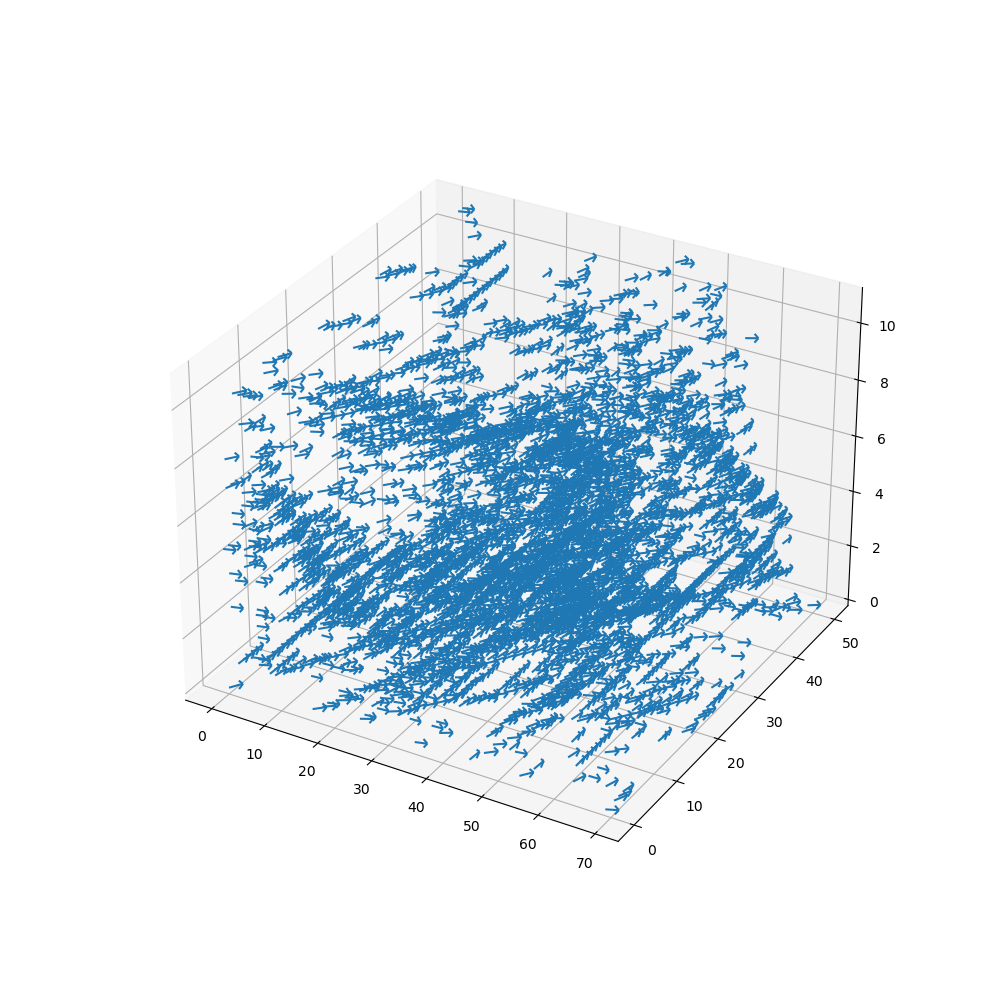

In [26]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.quiver(x, y, z, u, v, w, length=2)

plt.show()

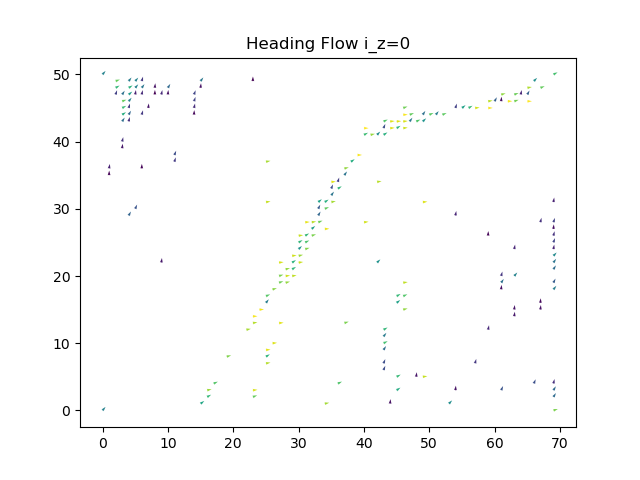

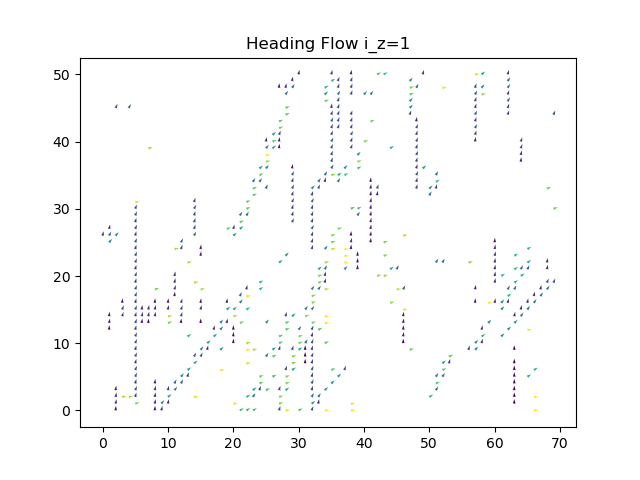

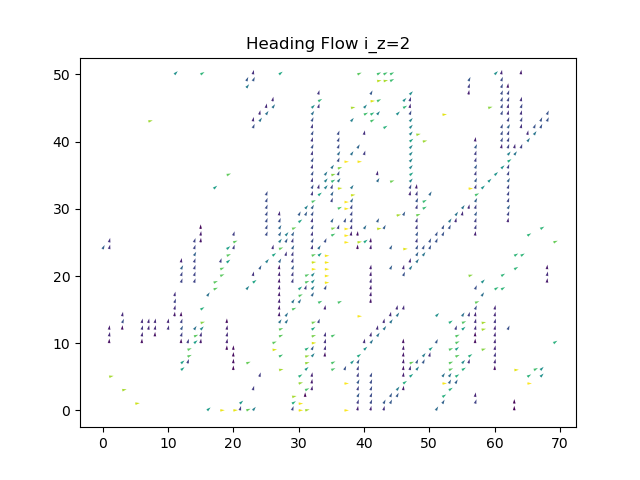

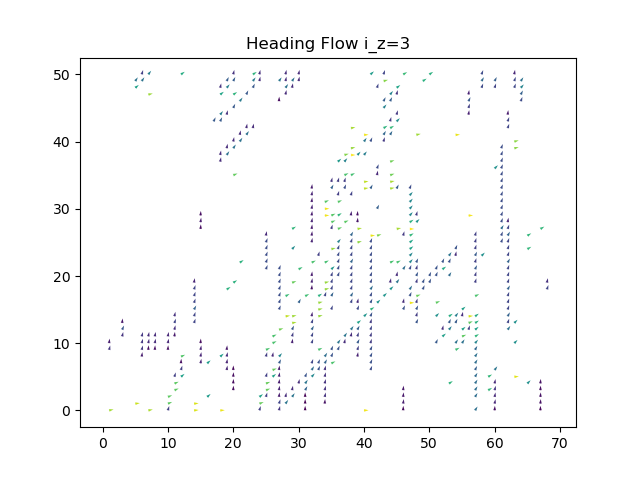

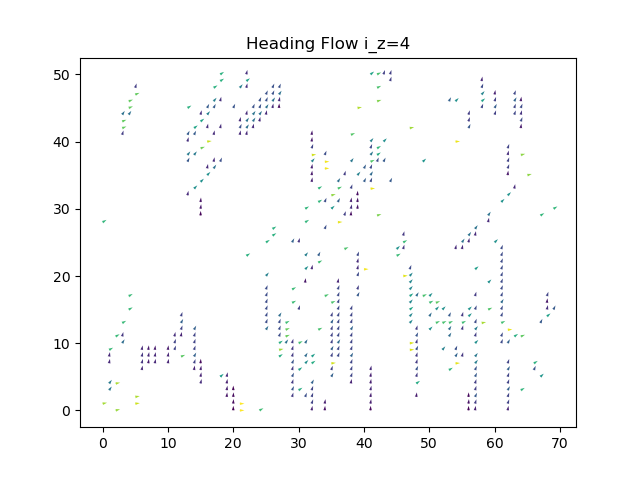

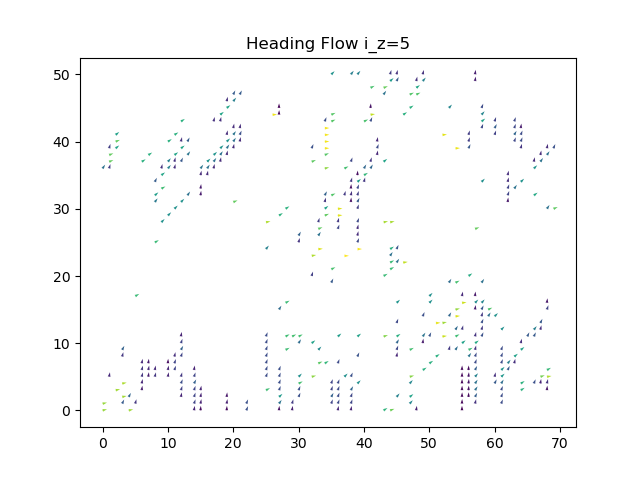

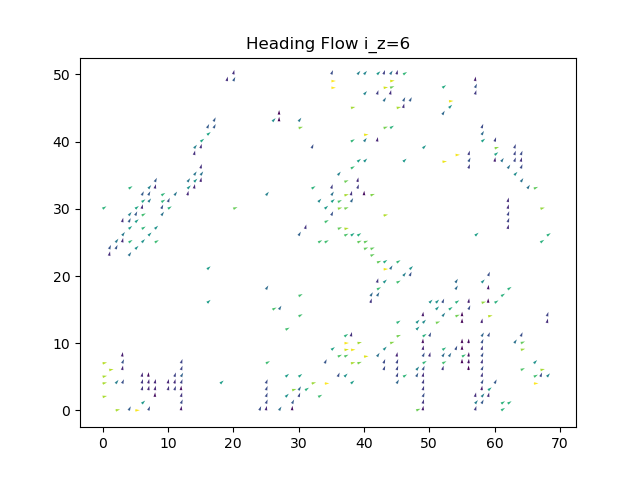

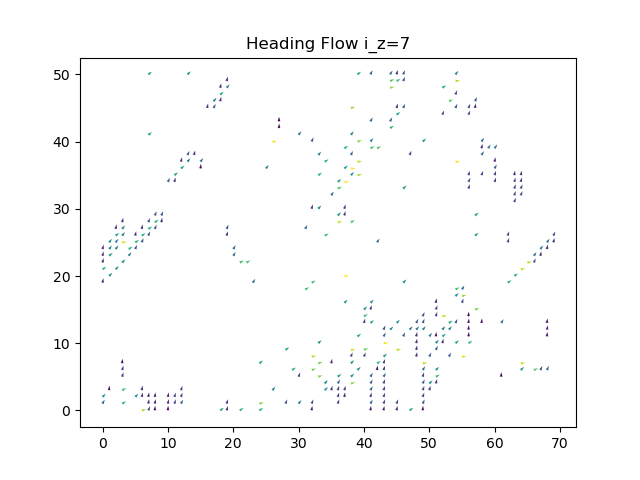

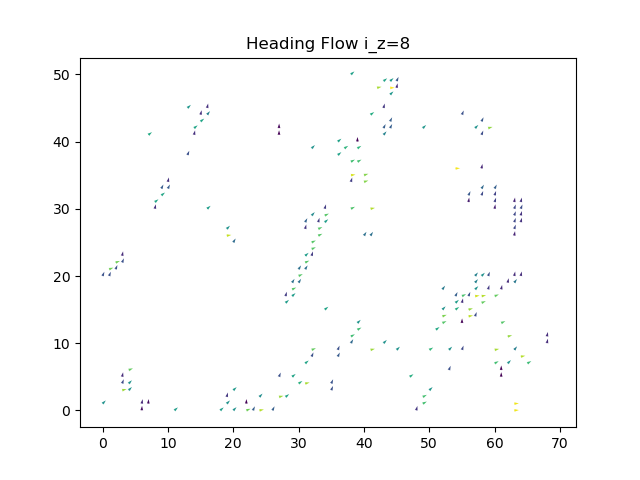

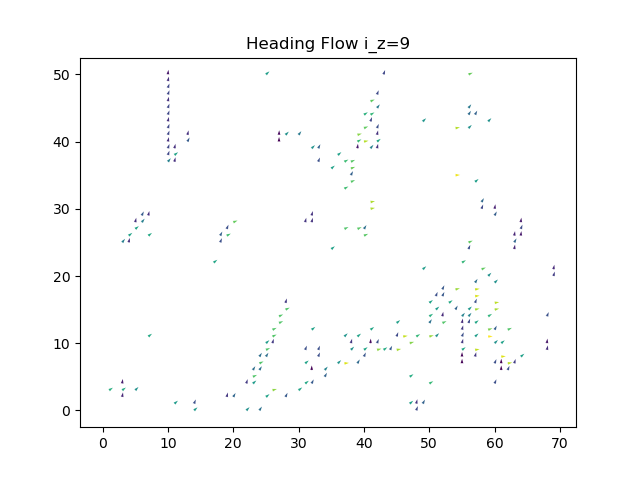

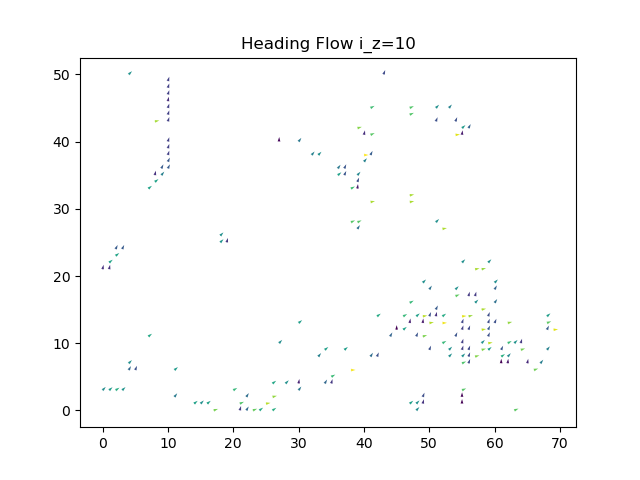

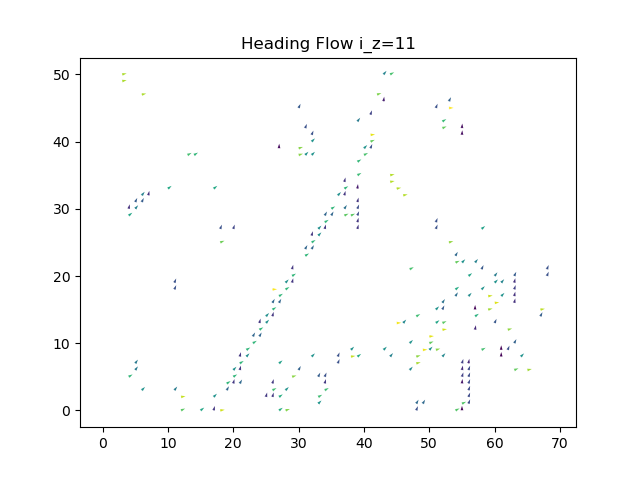

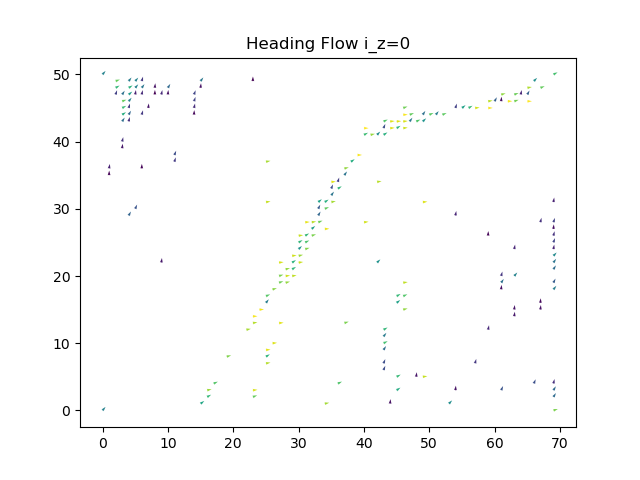

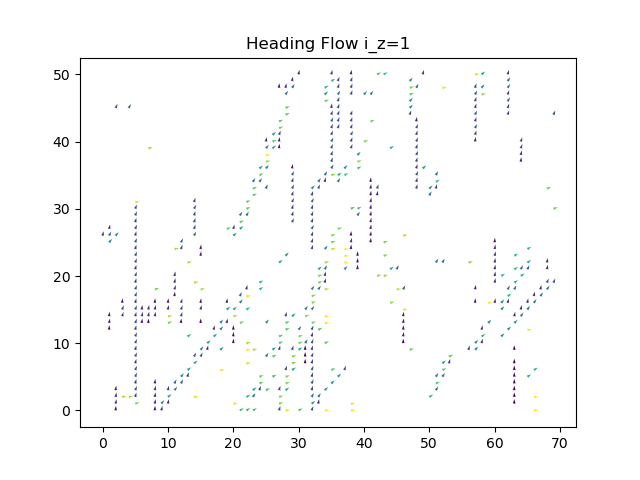

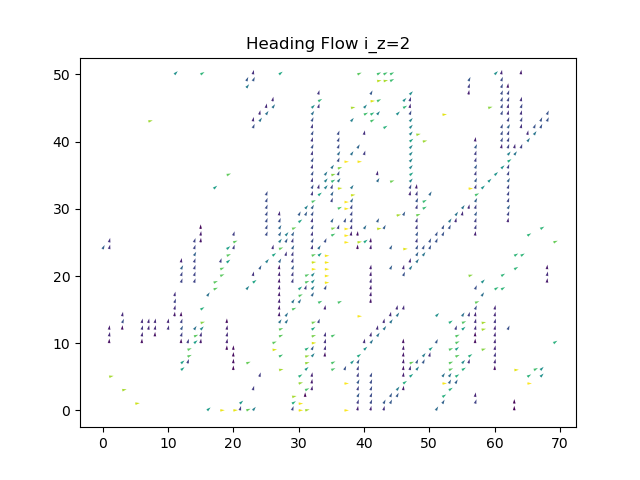

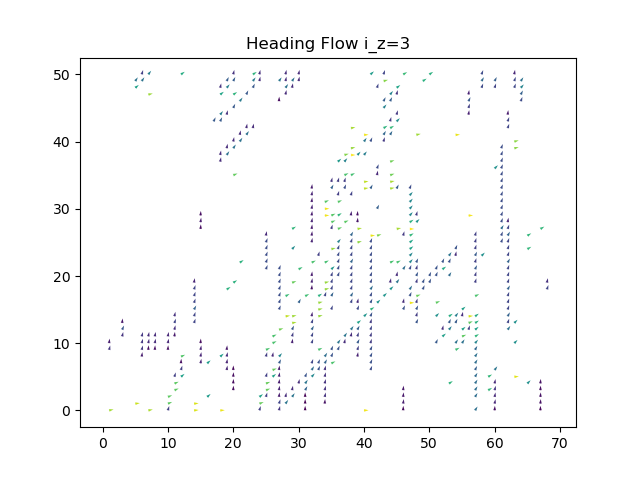

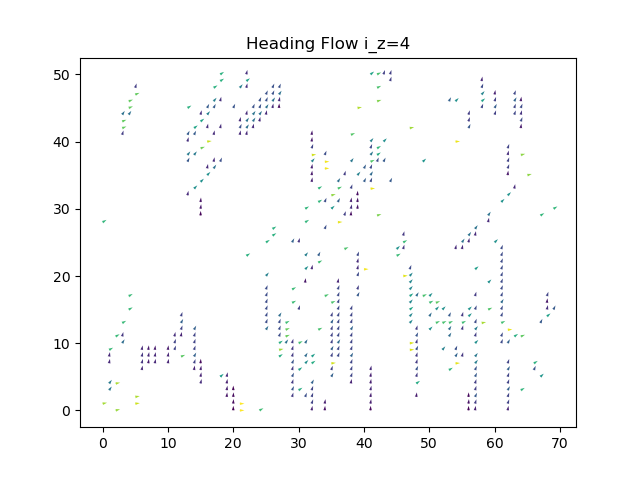

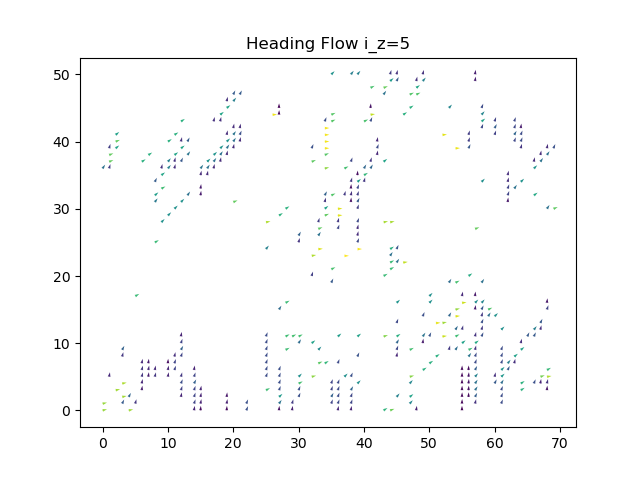

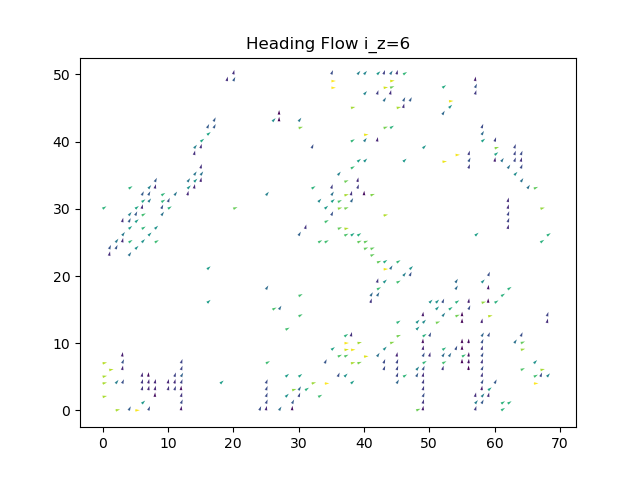

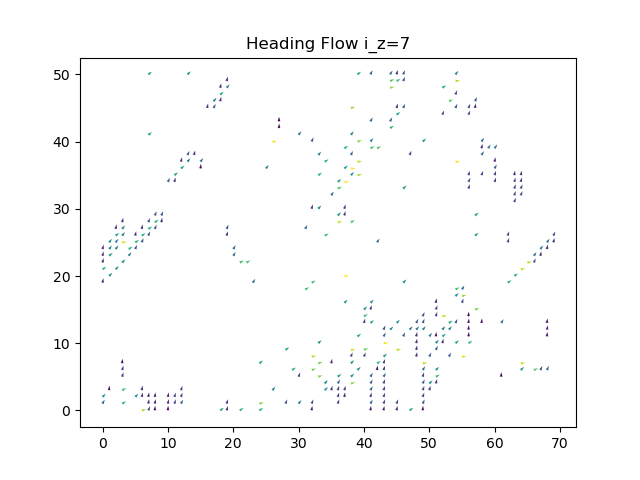

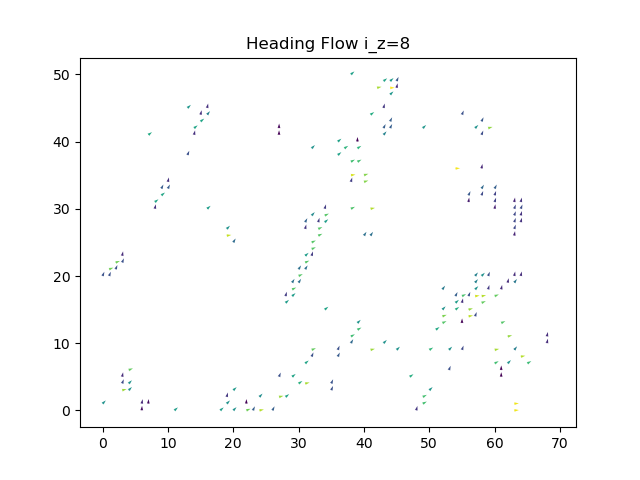

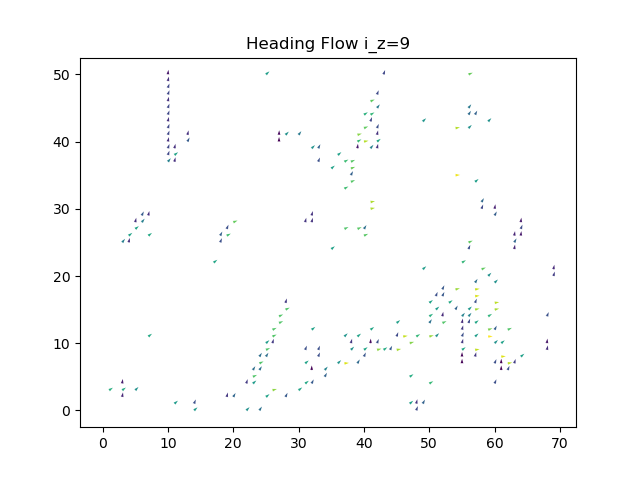

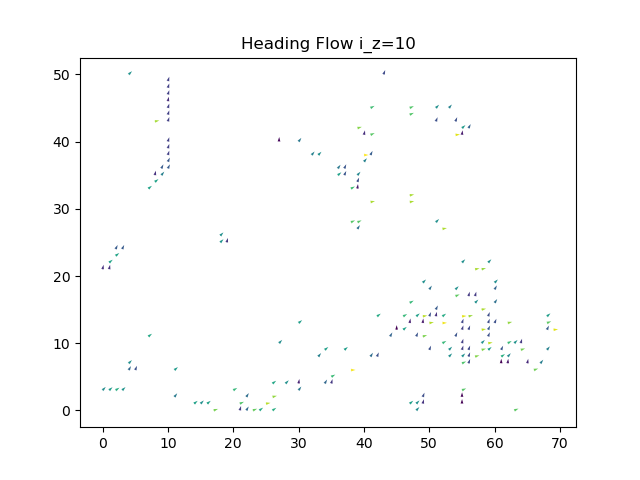

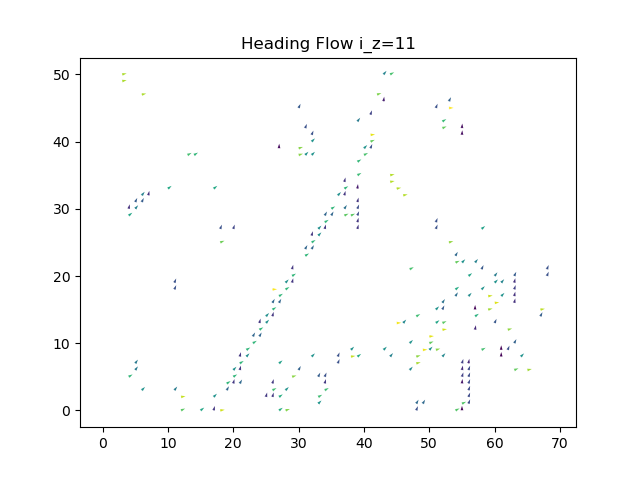

In [27]:
for z in range(angles.shape[2]):
    fig2, ax2 = plt.subplots()
    q = ax2.quiver(x[:,:,z],y[:,:,z],u[:,:,z],v[:,:,z], np.arctan2(u[:,:,z], v[:,:,z]))
    ax2.set_title(f'Heading Flow i_z={z}')
    fig2.show()

## Multispherical layers

In [54]:
n_ms_layers = 3
angle_step = 360/n_ms_layers
bins = np.arange(0,360+angle_step, angle_step)
layer_angles = list(zip(np.arange(0, 360, angle_step),np.arange(angle_step, 360 + angle_step, angle_step)))

In [55]:
binned_angles = np.digitize(angles, bins)

In [56]:
binned_angles = np.where(angles == 0, np.nan, binned_angles)

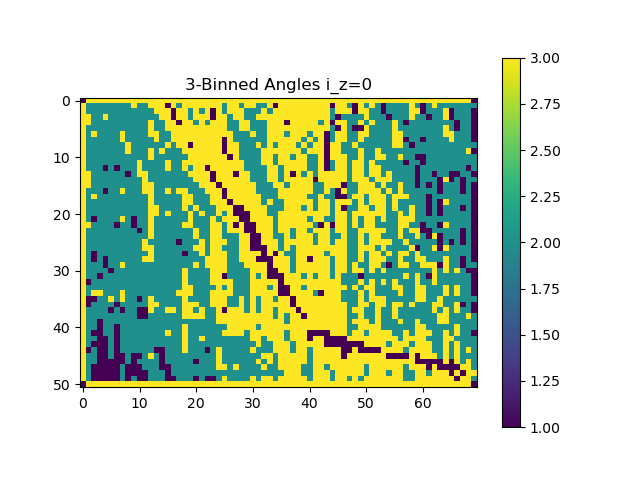

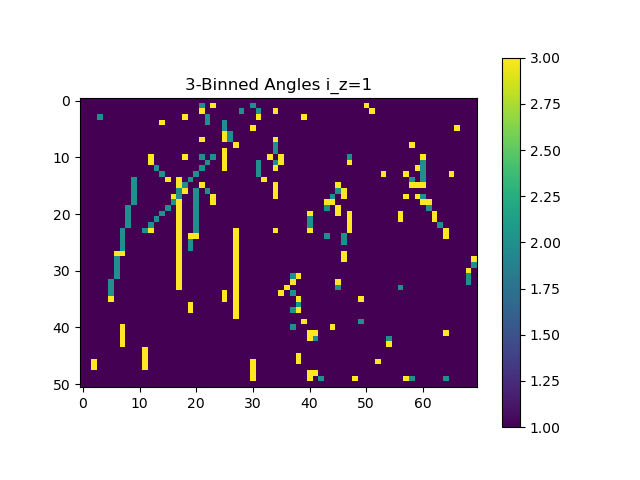

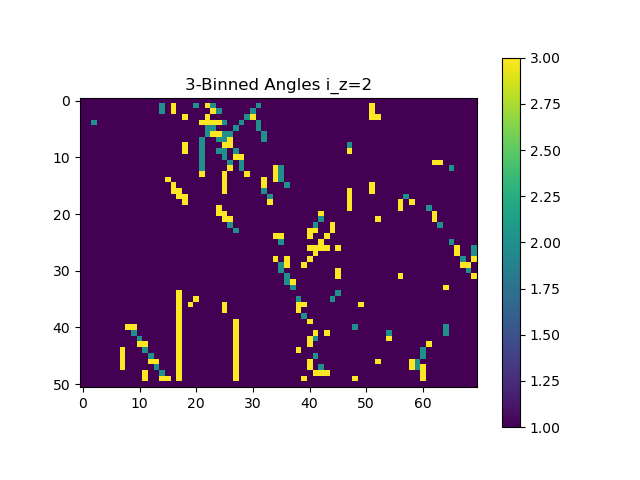

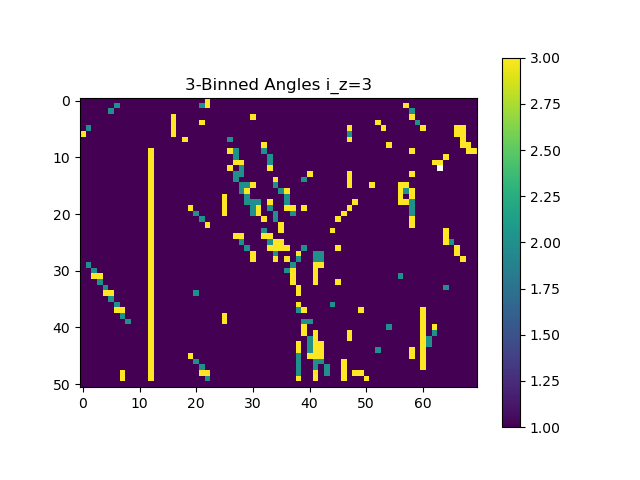

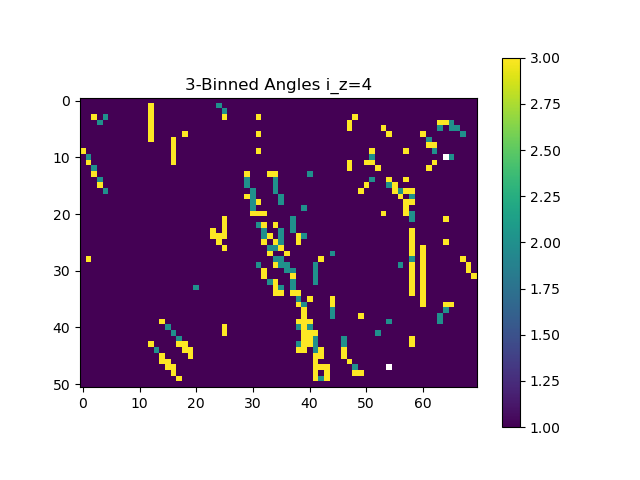

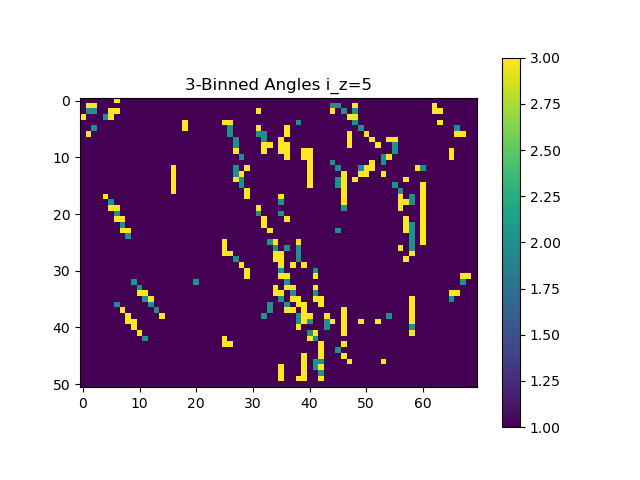

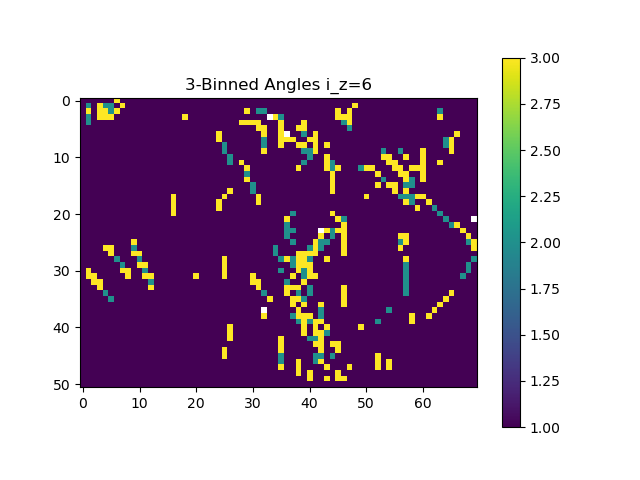

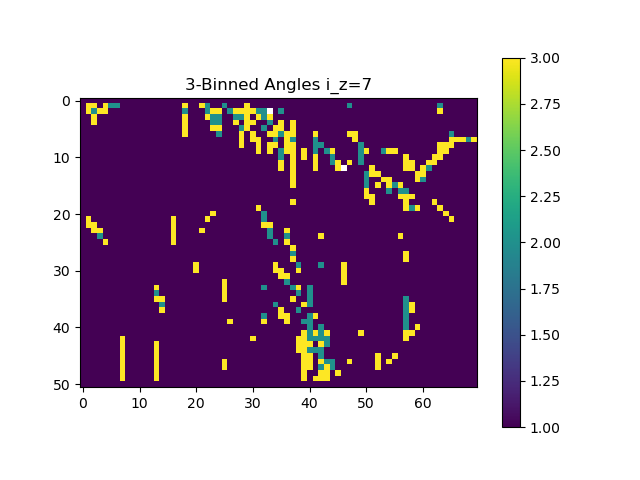

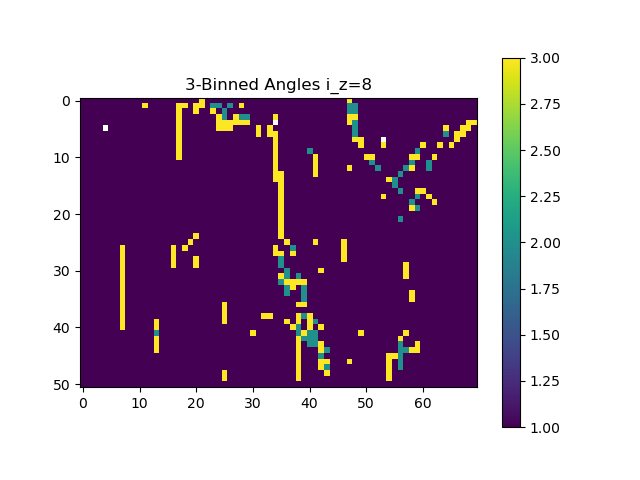

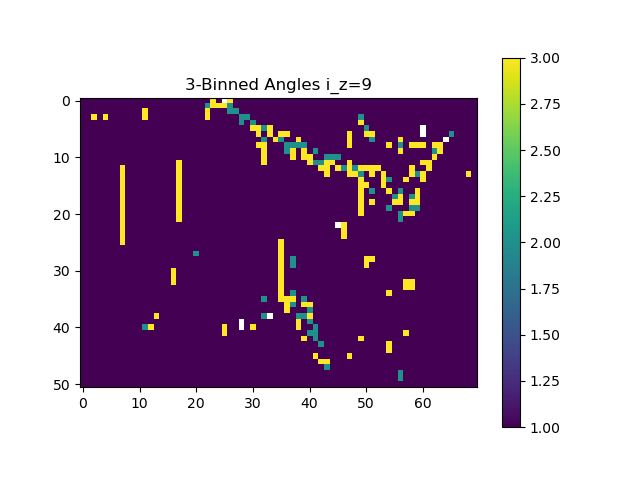

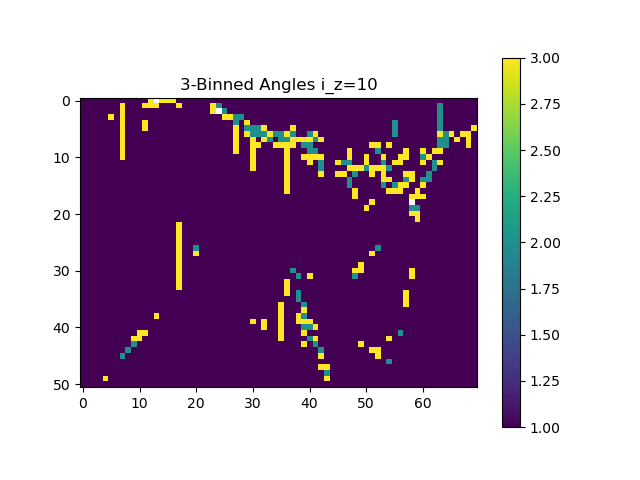

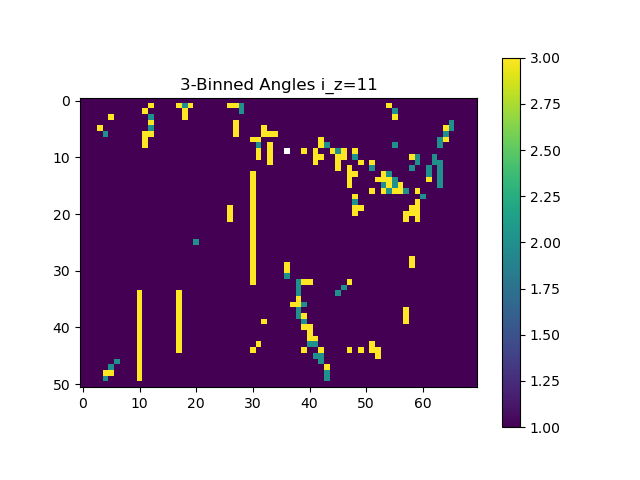

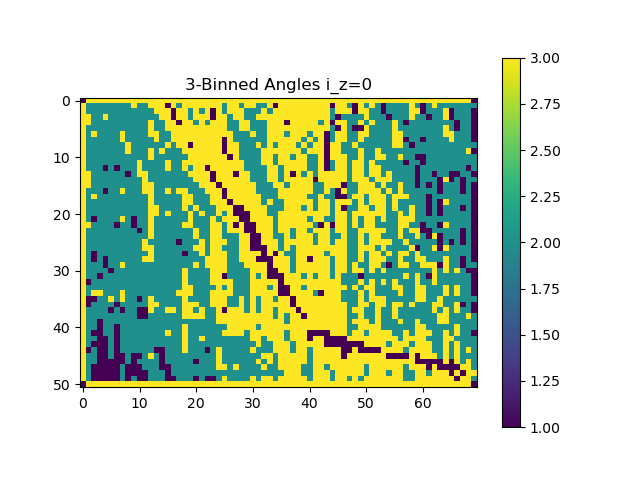

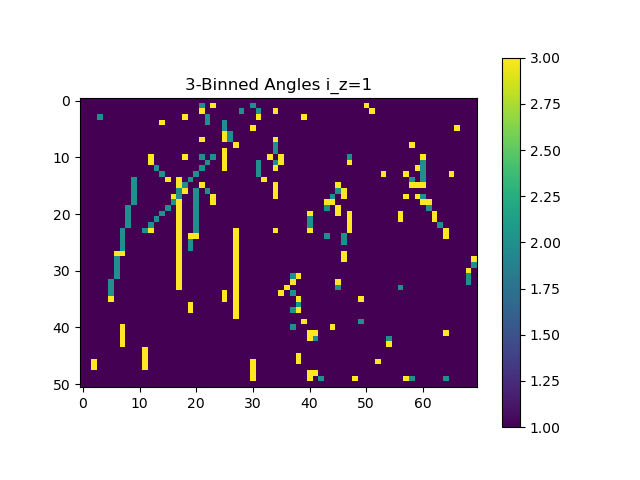

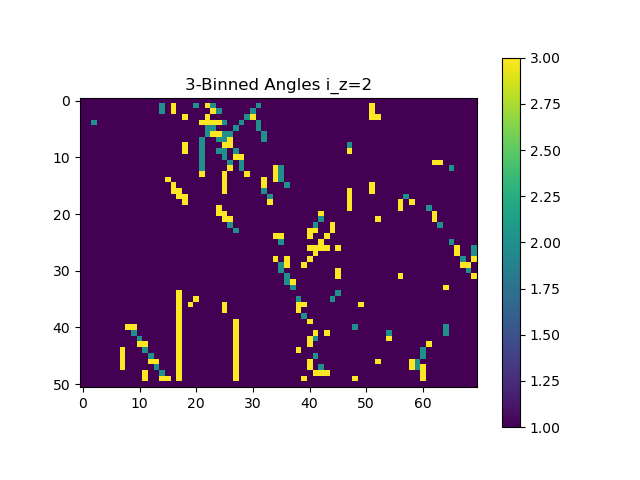

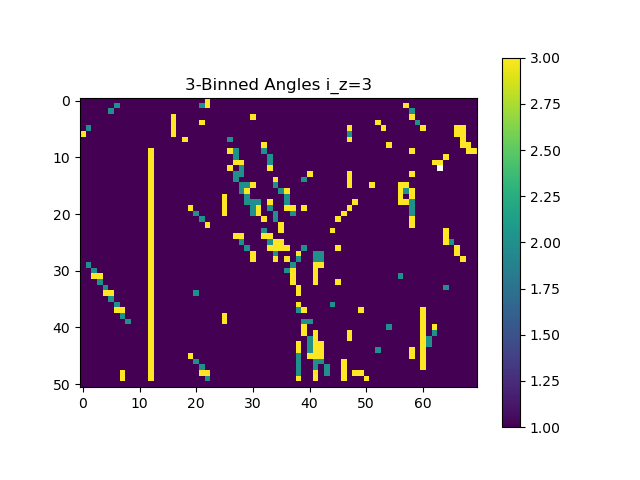

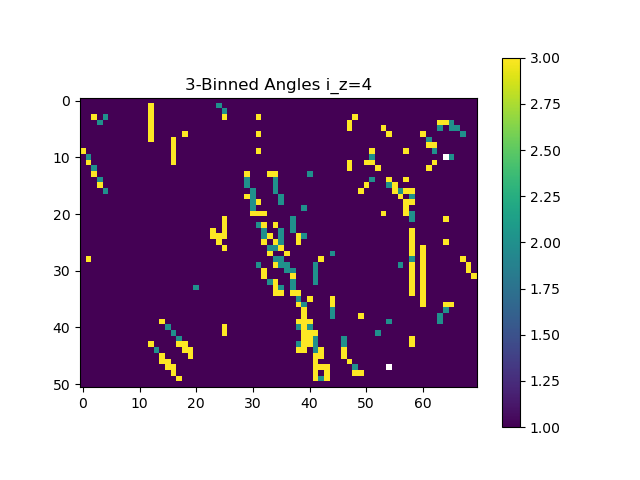

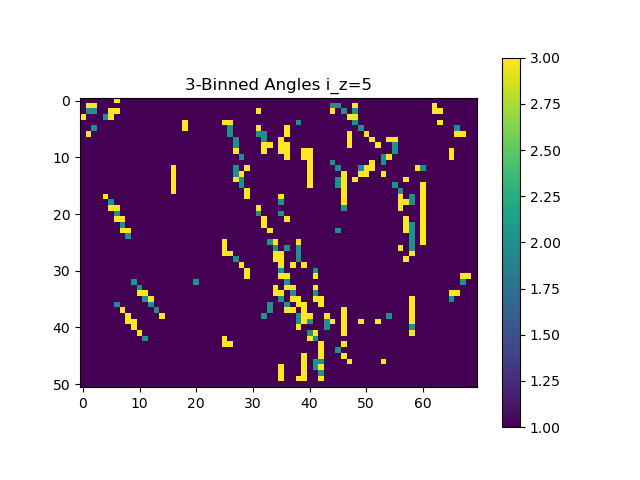

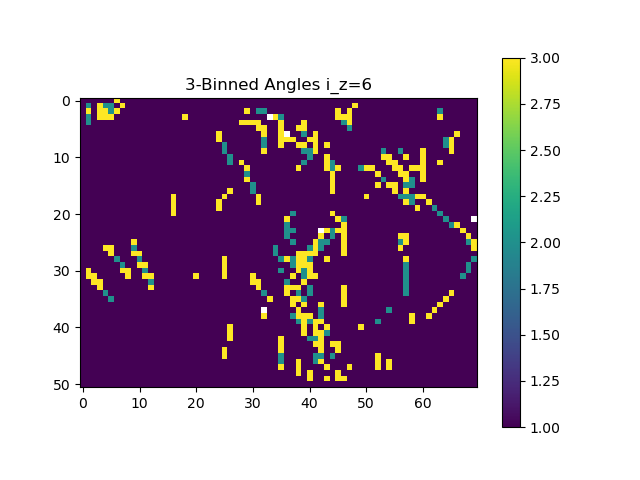

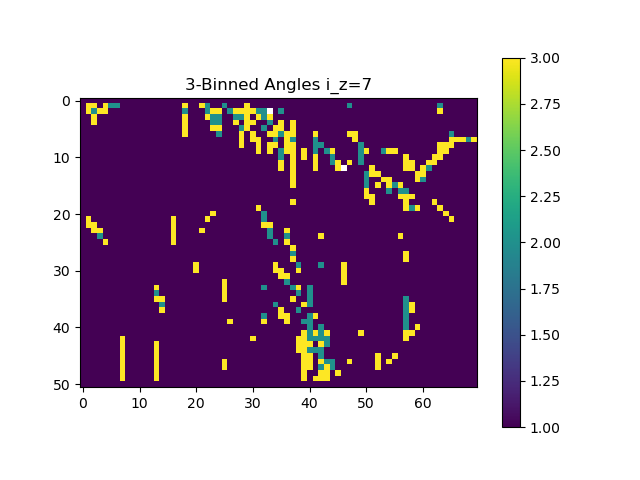

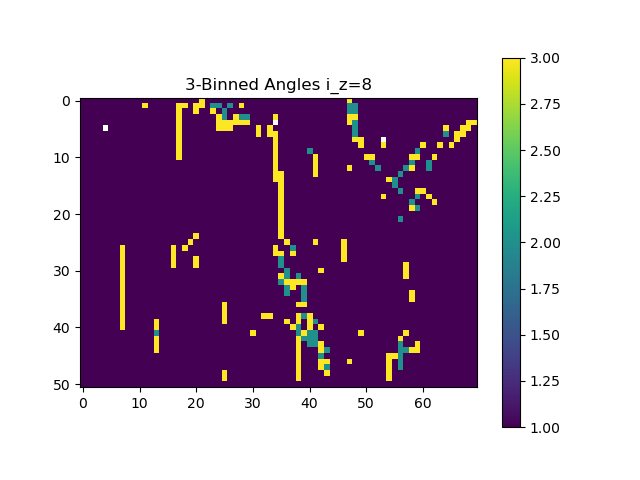

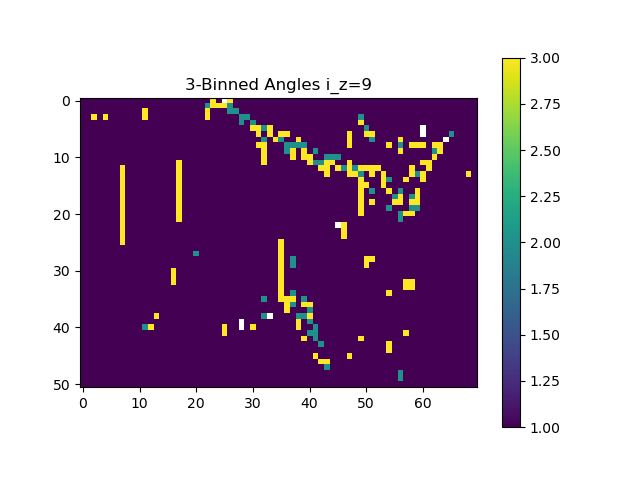

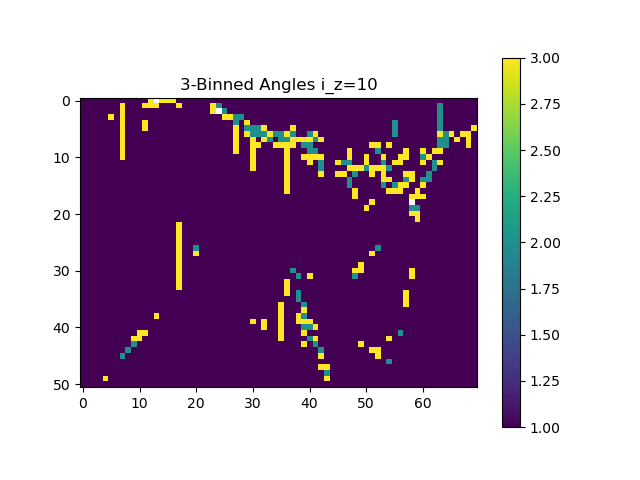

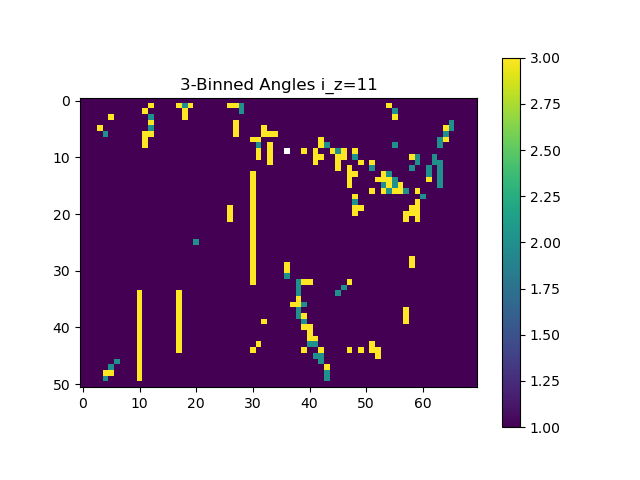

In [57]:
for z in range(angles.shape[2]):
    fig3, ax3 = plt.subplots()
#     q = ax3.quiver(x[:,:,z],y[:,:,z],u[:,:,z],v[:,:,z], np.arctan2(u[:,:,z], v[:,:,z]))
    im = ax3.imshow(binned_angles[:,:,z])
    cb = fig3.colorbar(im)
    ax3.set_title(f'{n_ms_layers}-Binned Angles i_z={z}')
    fig3.show()

## Clustering

In [58]:
from sklearn.cluster import *

In [59]:
xx, yy = np.meshgrid(range(angles.shape[1]), range(angles.shape[0]))

In [60]:
layer_clusters = []

for z in range(angles.shape[2]):
    layer_angles = angles[:,:,z].ravel()
    samples_mask = layer_angles!=0
    samples = np.column_stack((xx.ravel(), yy.ravel(), angles[:,:,z].ravel()))
    clusters = Birch(n_clusters=n_ms_layers).fit_predict(samples)
    layer_clusters.append(clusters.reshape((angles.shape[0], angles.shape[1])))

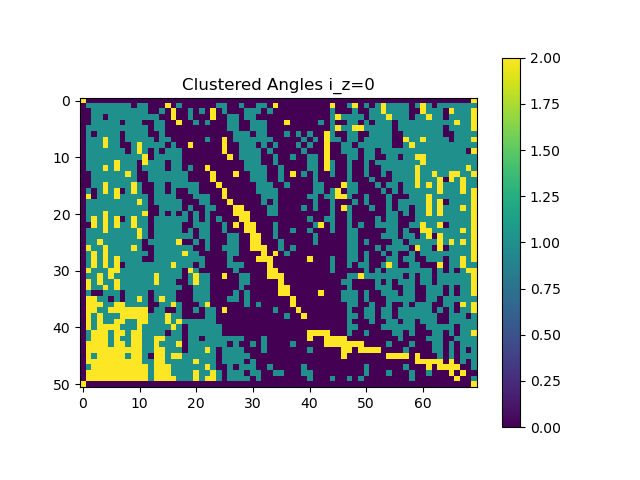

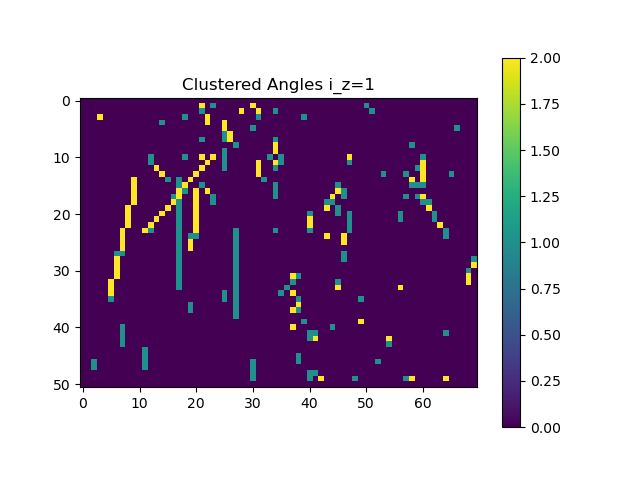

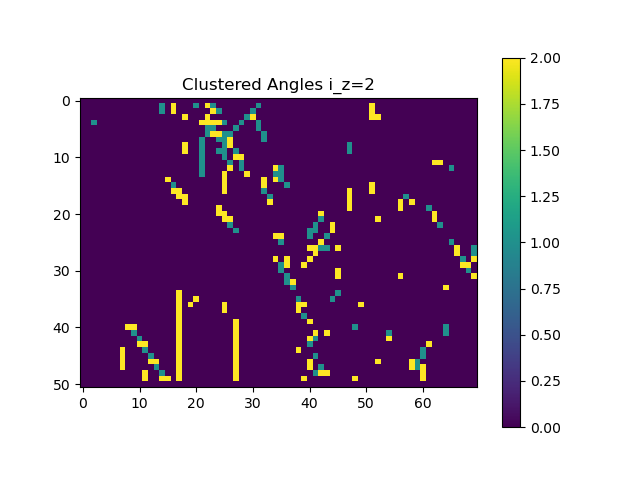

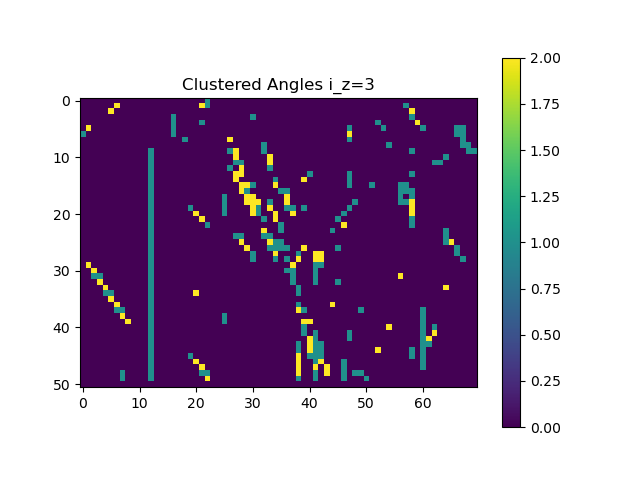

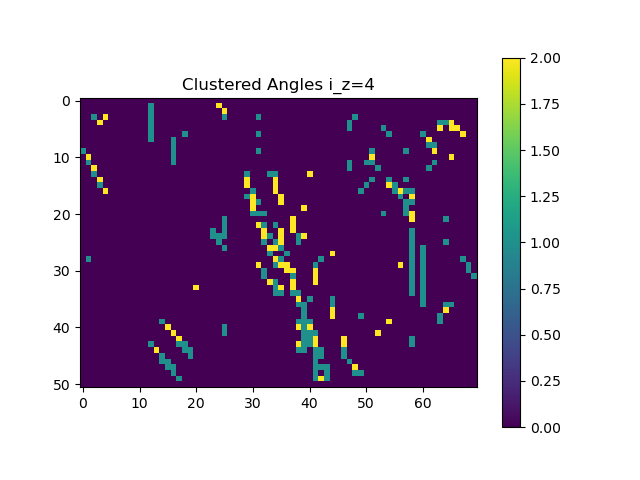

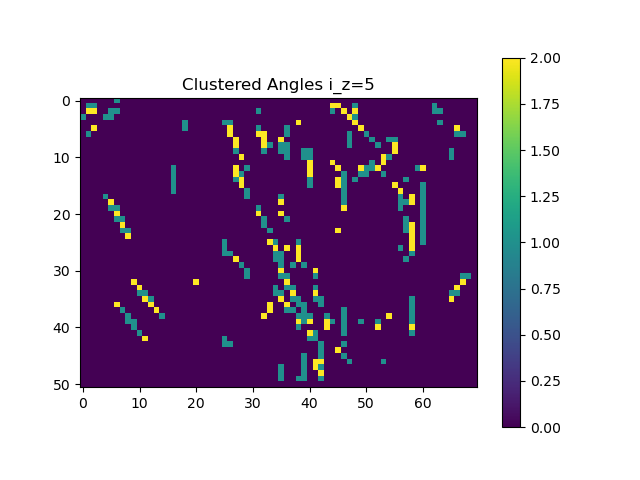

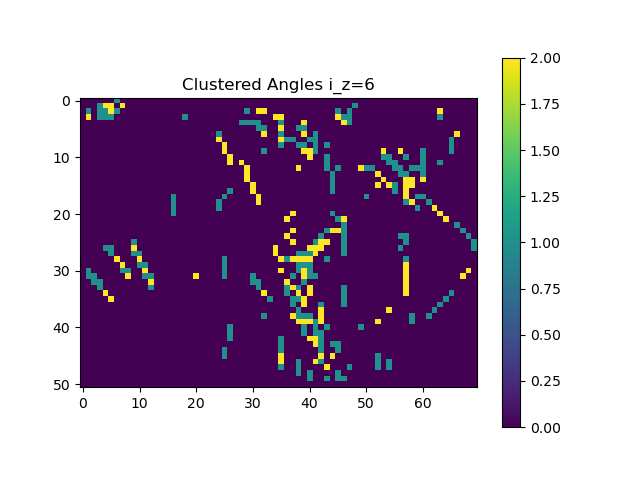

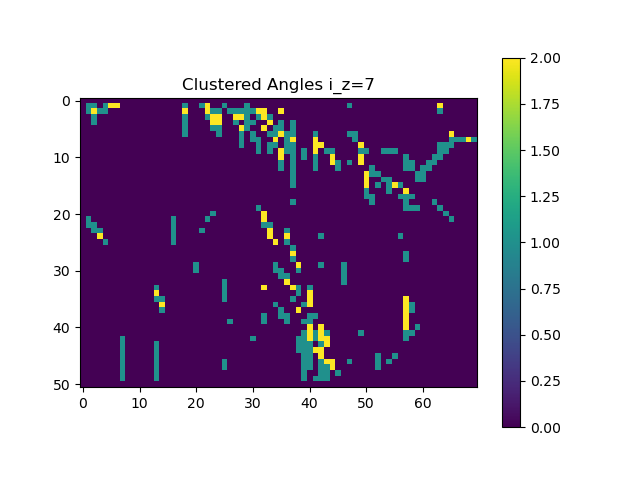

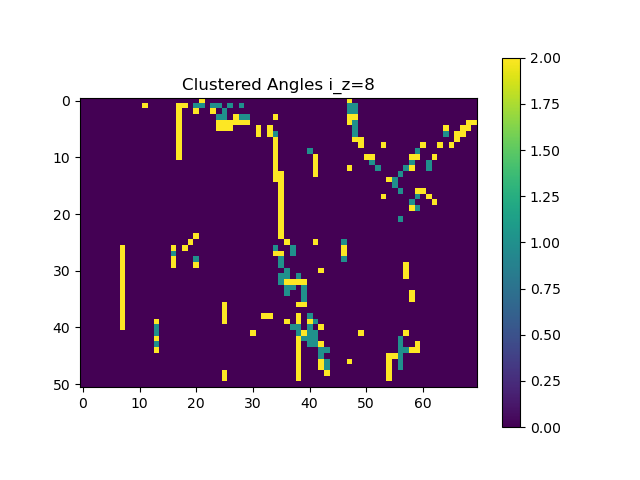

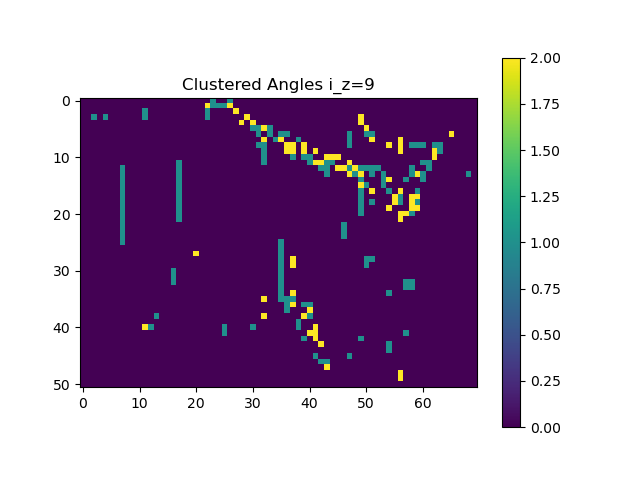

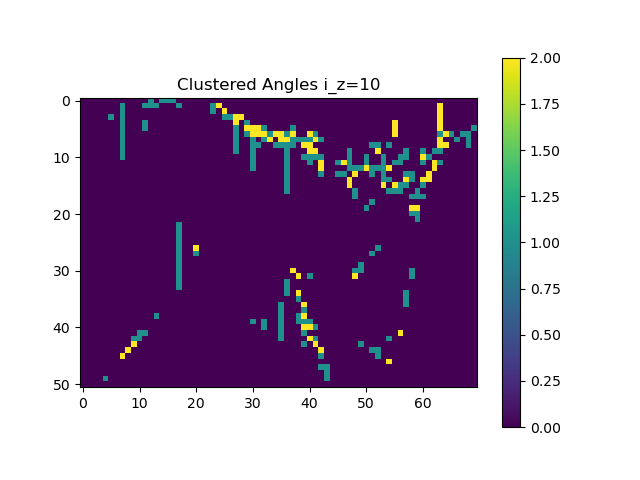

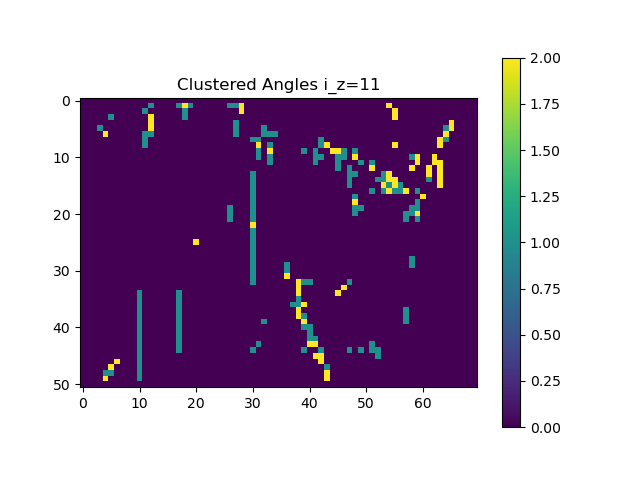

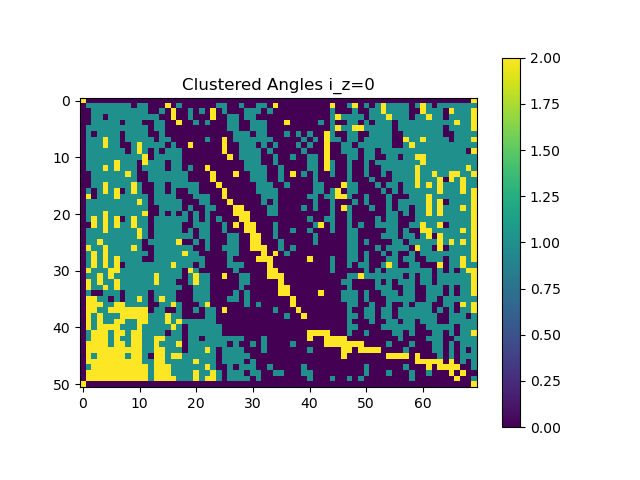

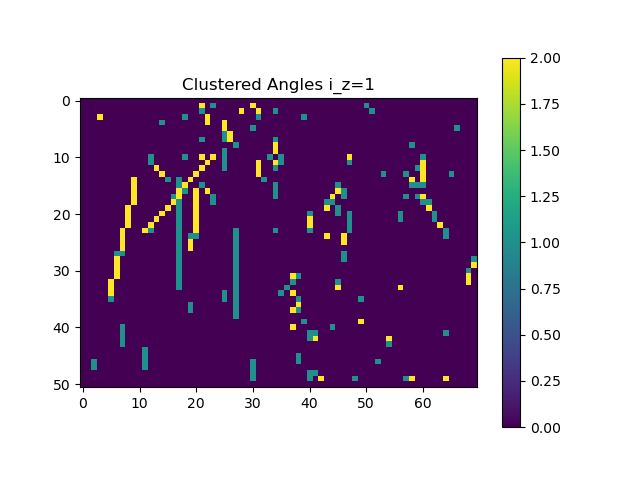

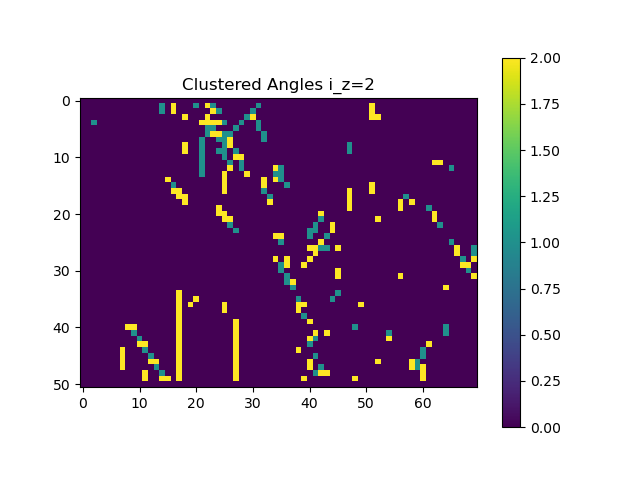

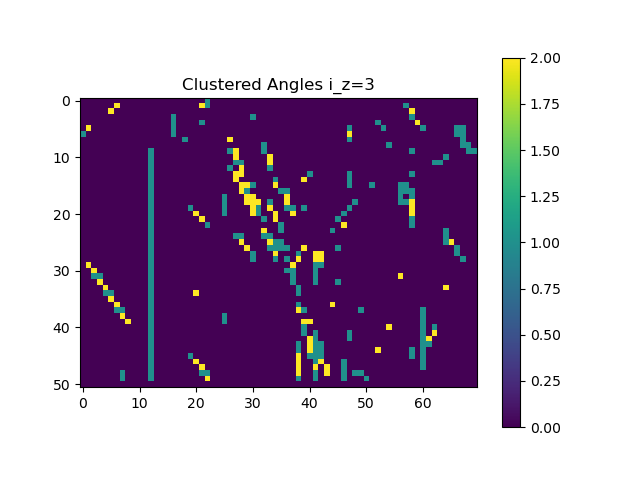

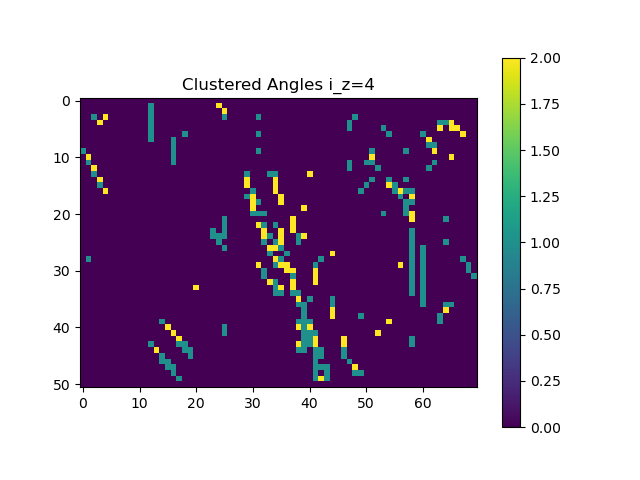

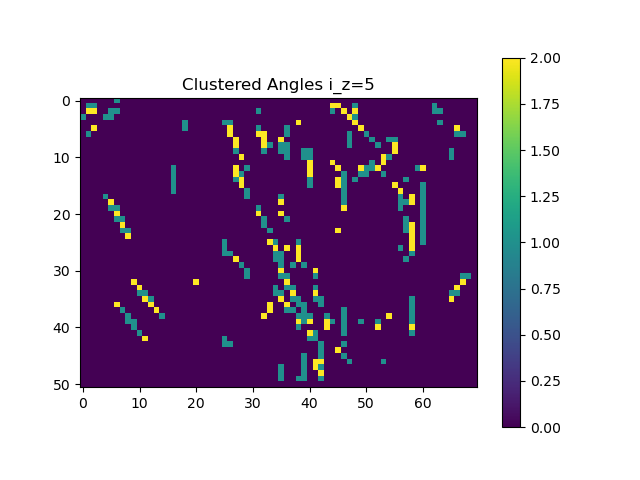

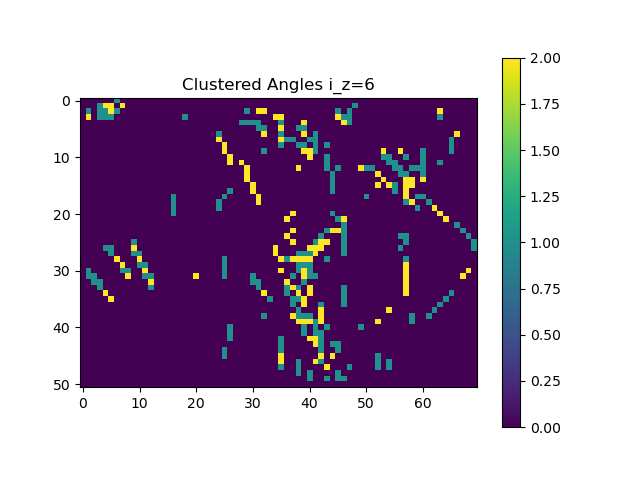

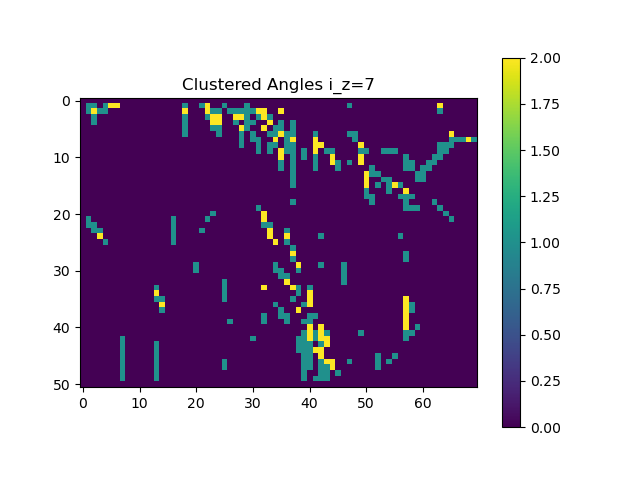

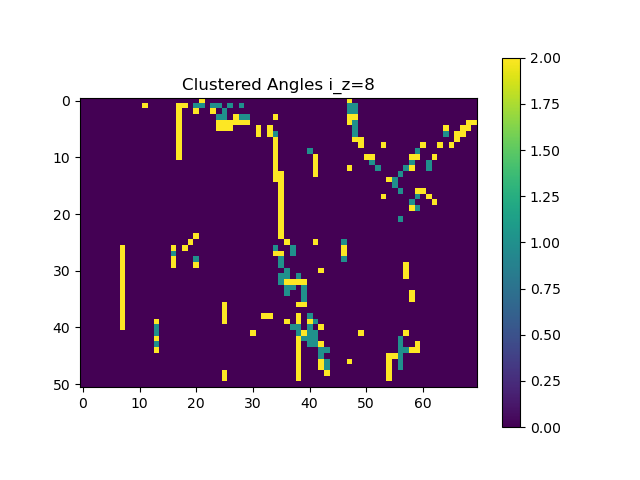

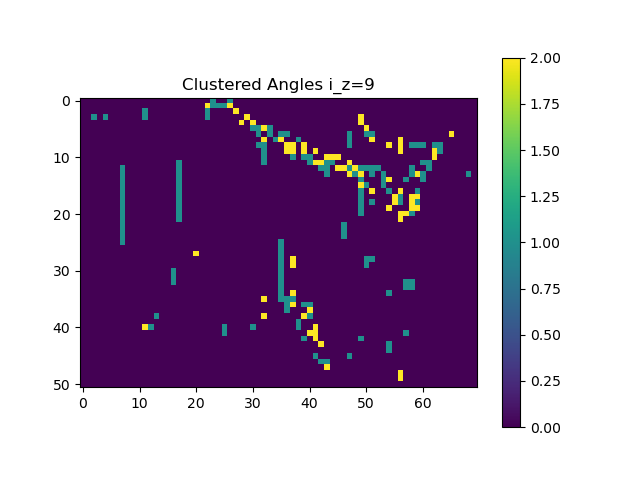

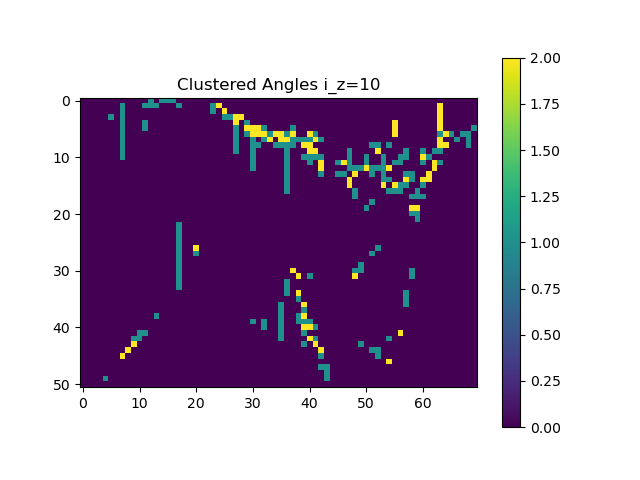

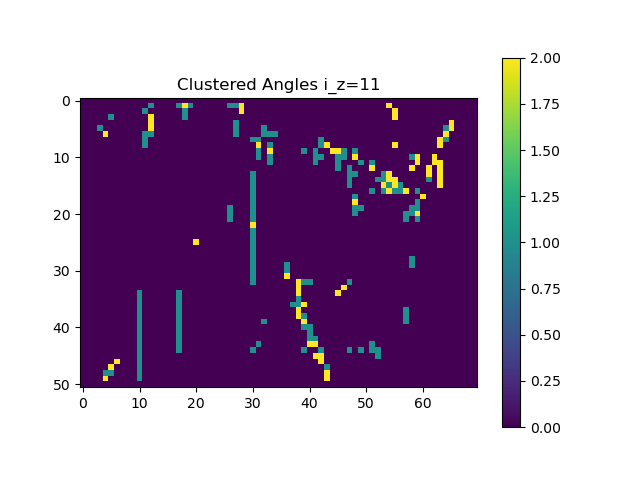

In [61]:
for z in range(angles.shape[2]):
    fig4, ax4 = plt.subplots()
    im = ax4.imshow(layer_clusters[z])
    cb = fig4.colorbar(im)
    ax4.set_title(f'Clustered Angles i_z={z}')
    fig4.show()